<div style="text-align:center; border: 1px solid #808080; padding: 10px;">
  <h1 style="color: gray; font-weight: bold;">Credit Card Predictive Analysis | EDA:</h1>
  <h2 style="color: gray; font-weight: bold;">Credit Risk Classification Using - Random Forest</h2>
</div>


# **Problem Statement**

In the financial sector, the ability to predict credit card defaults accurately is crucial for risk management and operational efficiency. Traditional scoring methods, though widely used, may not fully capture the complexities of consumer behavior. This project aims to develop a Random Forest Classifier Model that utilizes a comprehensive set of predictive features to enhance the accuracy of default predictions. By improving these predictions, banks can make more informed decisions about credit card approvals, potentially reducing default rates and fostering better customer relations.

**This project wants to create Random Forest Classifier Model to help banks decide who should get a credit card.**

# **Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, f1_score, precision_score, recall_score

# **Column Description of Application Record Dataset:**

| Feature Name        | Explanation                  | Remarks                                                  |
|---------------------|------------------------------|----------------------------------------------------------|
| ID                  | Client number                |                                                          |
| CODE_GENDER         | Gender                       |                                                          |
| FLAG_OWN_CAR        | Is there a car               |                                                          |
| FLAG_OWN_REALTY     | Is there a property          |                                                          |
| CNT_CHILDREN        | Number of children           |                                                          |
| AMT_INCOME_TOTAL    | Annual income                |                                                          |
| NAME_INCOME_TYPE    | Income category              |                                                          |
| NAME_EDUCATION_TYPE | Education level              |                                                          |
| NAME_FAMILY_STATUS  | Marital status               |                                                          |
| NAME_HOUSING_TYPE   | Way of living (House Type)                |                                                          |
| DAYS_BIRTH          | Birthday                     | Count backwards from current day (0), -1 means yesterday |
| DAYS_EMPLOYED       | Start date of employment     | Count backwards from current day(0). If positive, it means the person currently unemployed. |
| FLAG_MOBIL          | Is there a mobile phone      |                                                          |
| FLAG_WORK_PHONE     | Is there a work phone        |                                                          |
| FLAG_PHONE          | Is there a phone             |                                                          |
| FLAG_EMAIL          | Is there an email            |                                                          |
| OCCUPATION_TYPE     | Occupation                   |                                                          |
| CNT_FAM_MEMBERS     | Family size                  |                                                          |


# **Loading Dataset(Application Record)**

In [ ]:
url = 'https://github.com/audreynaila/Credit-Crad-Risk-Analysis-EDA-Random-Forest/blob/a85cb7173d422f69e706def8553e59198ac7fe41/application_record.xlsx?raw=true'
df_application_record = pd.read_excel(url)

df_application_record.head(10)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1


In [ ]:
df_application_record.tail(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,NaN,2
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2


# **Getting know about the dataset(Application Record)**

In [ ]:
print('The number of rows in Application Record dataset is', df_application_record.shape[0] , '\n')

print('The number of columns in Application Record dataset is', df_application_record.shape[1])

The number of rows in Application Record dataset is 438557 

The number of columns in Application Record dataset is 18


In [ ]:
df_application_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
dtype: object

----
### **Observation**
- The dataset of application record contains 438557 rows and 18 columns
- This dataset contains eight of columns of `object` datatype
- And remaining 10 columns has of `numric` datatype
----

# **Loading Dataset(Credit Record)**

In [ ]:
url = 'https://github.com/audreynaila/Credit-Crad-Risk-Analysis-EDA-Random-Forest/blob/a85cb7173d422f69e706def8553e59198ac7fe41/credit_record.csv?raw=true'
df_credit_record = pd.read_csv(url)


df_credit_record.head(10)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
df_credit_record.tail(10)

,ID,MONTHS_BALANCE,STATUS
1048565,5150487,-20,C
1048566,5150487,-21,C
1048567,5150487,-22,C
1048568,5150487,-23,C
1048569,5150487,-24,C
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


# **Getting know about the dataset(Credit Record)**

In [ ]:
print('The number of rows in Credit Record dataset is', df_credit_record.shape[0] , '\n')

print('The number of columns in Credit Record dataset is', df_credit_record.shape[1])

The number of rows in Credit Record dataset is 1048575 

The number of columns in Credit Record dataset is 3


In [ ]:
df_credit_record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

---

### **Observation**

- The dataset of credit record contains 1048575 rows and 3 columns
- This dataset contains 1 columns of `object` datatype which shows `Status` of billing details status of creddit card
- And remaining 2 columns has  `numric` datatype

----

# **Merging two datasets (Basis of common `ID`)**

In [ ]:
df = pd.merge(df_application_record, df_credit_record, on='ID' , how='inner')

# **Previewing the merged dataset**

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C


# **Getting know about the merged dataset**

In [ ]:
print(f'The number of rows in merged dataset (df) = {df.shape[0]} \n The number of columns in merged dataset (df) is = {df.shape[1]}' )

The number of rows in merged dataset (df) = 777715 
 The number of columns in merged dataset (df) is = 20


----
### **Observation:**

- At earlier we have seen that `Application record` dataset has `438557` rows
- Now, our merged dataset has only contain `777715`
- That means `Application Record & Credit Record` dataset has only `777715` rows which have common `ID` numbers

----

# **Checking for missing values & Dealing with them**

In [ ]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

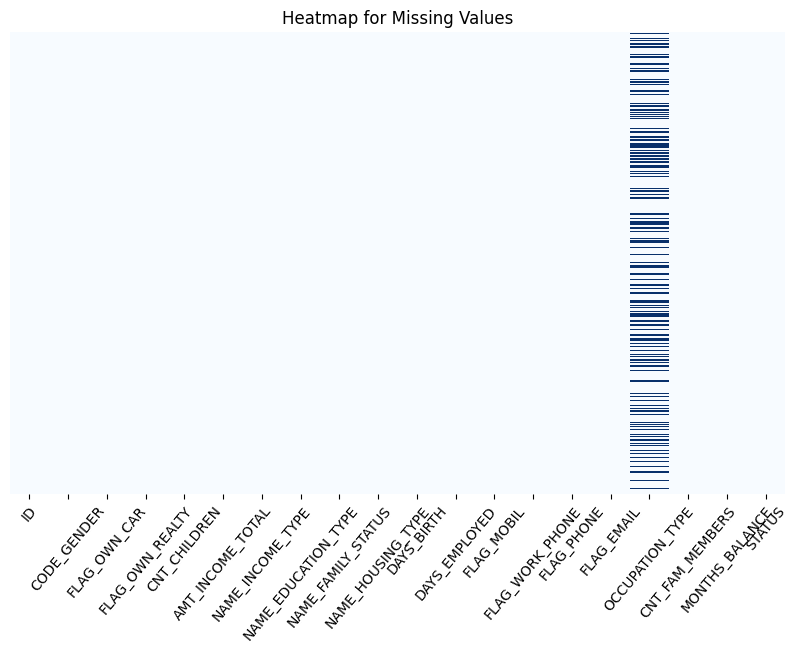

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='Blues')

plt.title('Heatmap for Missing Values')
plt.xticks(rotation=50)
plt.show()

In [ ]:
missing_value_percentage = df['OCCUPATION_TYPE'].isna().sum() / df.shape[0] * 100

print(f"Result Missing Value: {missing_value_percentage:.2f}%")

Result Missing Value: 30.87%


---
### **Observation:**

- There are only one column in our datafrme which has null values.
- This column is `OCCUPATION_TYPE` and it has `240048` missing values and it has percentage of `30.87%` missing values

- We have only one option which is to drop the column `OCCUPATION_TYPE` because it has a high percentage of missing values and secondly every person has itd own unique record. and we cannot simply impute the missing values with mode

----



In [ ]:
df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

# **Checking for unique values count in dataframe**

In [ ]:
unique_values = df.nunique()


unique_values_df = pd.DataFrame(unique_values, columns=['Unique Values'])
display(unique_values_df)

,Unique Values
ID,36457
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
CNT_CHILDREN,9
AMT_INCOME_TOTAL,265
NAME_INCOME_TYPE,5
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6


---

### **Observation:**
- Our dataset has `777715` rows but there are only `36457` unique values in `ID` column.
- This shows that there maybe duplicates in our dataset
---

# **Checking for duplicates**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df['ID'].duplicated()].head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-9,C
10,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2,-10,C


---

In [ ]:
df[df['ID'].duplicated()].tail(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777705,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-4,0
777706,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-5,0
777707,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-6,0
777708,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-7,0
777709,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-8,0
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-12,0
777714,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1,-13,0


---

### **Observation:**

- By carefully checking the dataset we can say that on basis of number of unique enteries in `ID` column we have data of `36457` clients.
- And there are no duplicates in our dataset the data of `36457 ID` which is collected on the basis of different months of `MONTHS_BALANCE`
---

# **Renaming the columns**

In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [ ]:
# columns in a meaning full way

df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'

} , inplace=True)


In [ ]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status'],
      dtype='object')

# **Mapping the values in a meaningful way**

In [ ]:
df.select_dtypes(include='object').columns

Index(['gender', 'own_car', 'own_property', 'income_type', 'education',
       'family_status', 'housing_type', 'status'],
      dtype='object')

In [ ]:
col = ['gender', 'own_car', 'own_property']

for i in col:
    print(f'{df[i].value_counts()}')



gender
F    518851
M    258864
Name: count, dtype: int64
own_car
N    473355
Y    304360
Name: count, dtype: int64
own_property
Y    512948
N    264767
Name: count, dtype: int64


In [ ]:
df['gender'] = df['gender'].map({'F':'female', 'M': 'male'})

df['own_car'] = df['own_car'].map({'N': 'no', 'Y': 'yes'})

df['own_property'] = df['own_property'].map({'N': 'no', 'Y': 'yes'})

In [ ]:
df['status'].value_counts()

status
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

# **Feature Engineering**

In [ ]:
# maping the values in status column and storing result in new column

df['loan_status'] = df['status'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'good' , 'X' : 'no_loan'})


In [ ]:
df.columns.values

array(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone',
       'phone', 'email', 'family_members', 'months_balance', 'status',
       'loan_status'], dtype=object)

# **Exploratory Data Analysis**

---
### **Purpose:**
- The main goal of the analysis is to get ideas about the different attributes of the clients.
- To get an overview of the distribution of the data.
- To get an overview of the relationship between the attributes.
- Particularly, to get an overview of the relationship between the attributes and the target variable[`loan_status`].
---

### **Checking for distribution of `[gender , own_car,  own_property , income_type]`**

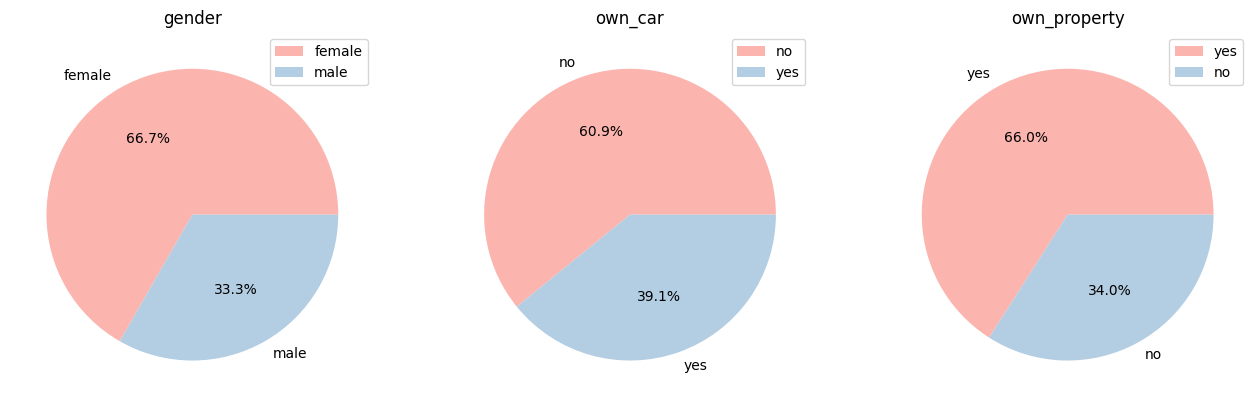

In [ ]:
columns = ['gender', 'own_car', 'own_property']

plt.figure(figsize=(16, 9))

for i in range(len(columns)):
    plt.subplot(1, 3, i+1)
    plt.title(columns[i])


    counts = df[columns[i]].value_counts()
    colors = plt.get_cmap('Pastel1')(range(len(counts)))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)


    plt.legend(counts.index)
plt.show()


<ipython-input-32-226f60ad3a26>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col[i], palette=colors[col[i]])
<ipython-input-32-226f60ad3a26>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col[i], palette=colors[col[i]])
<ipython-input-32-226f60ad3a26>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col[i], palette=colors[col[i]])
<ipython-input-32-226f60ad3a26>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

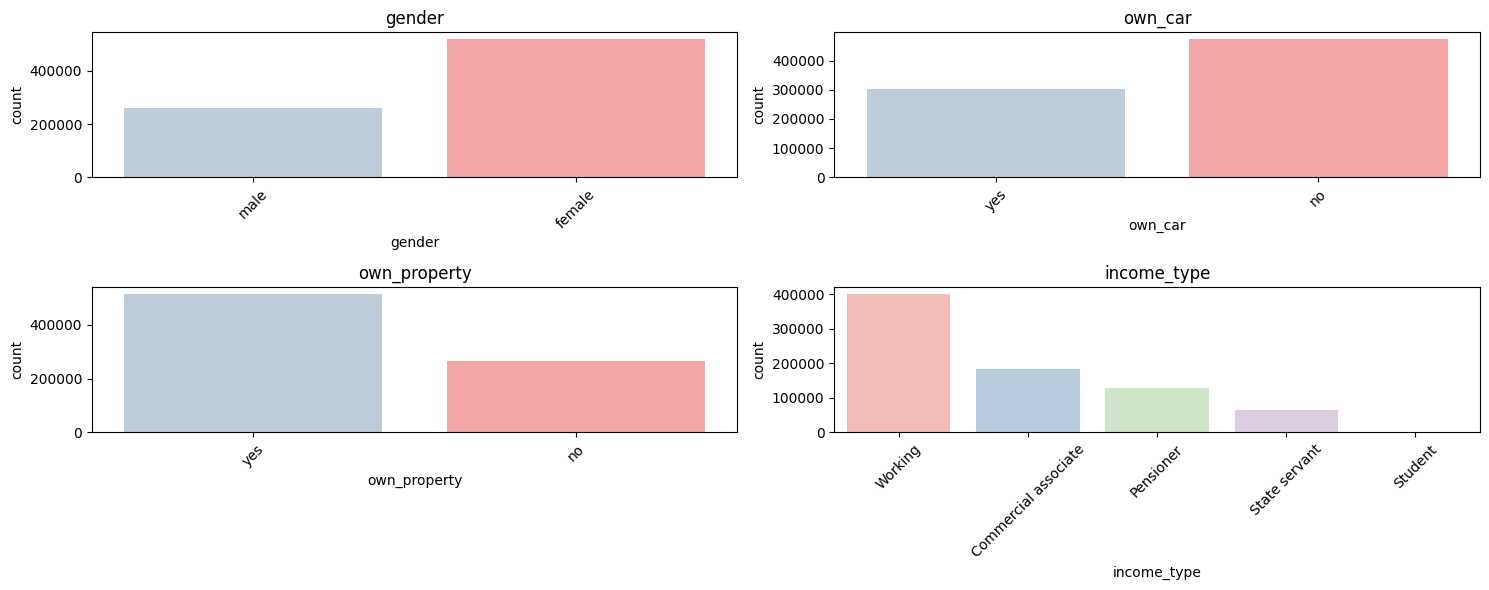

In [ ]:
col = ['gender', 'own_car', 'own_property', 'income_type']

colors = {
    'gender': ["#bacbdd","#ff9999"],
    'own_car': ["#bacbdd", "#ff9999"],
    'own_property': ["#bacbdd", "#ff9999"],
    'income_type': 'Pastel1'
}

plt.figure(figsize=(15, 6))

for i in range(len(col)):

    plt.subplot(2, 2, i+1)
    plt.title(col[i])
    sns.countplot(data=df, x=col[i], palette=colors[col[i]])
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


----

### **Observation:**

- There are more Female clients in our dataframe than the male clients
- The number of clients who don't have car is more than the number of clients who have car
- More number of clients have their own property
---

In [ ]:
df['loan_status'].value_counts()

loan_status
good                 329536
first_month_due      290654
no_loan              145950
2nd_month_due          8747
bad_debt               1527
3rd_month_overdue       801
4th_month_overdue       286
5th_month_overdue       214
Name: count, dtype: int64

---
### **Observation:**
- Most of the clients in our dataset have paid off their loan for that month
- first month loan due and no loan for the month comes at 2nd and 3rd place respectively in terms of value counts
- `1527` clients have bad debt

---

### **Getting insight from `loan status v/s gender`**

### *plotting count plot of loan status v/s gender*

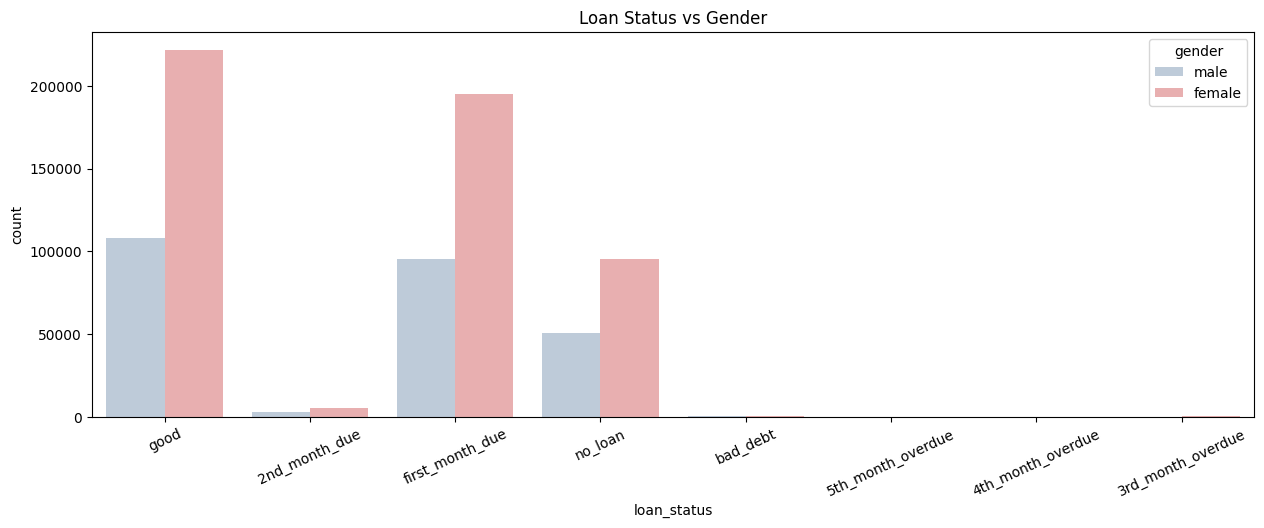

In [ ]:
plt.figure(figsize=(15, 5))

custom_palette = {'female': '#f1a5a7', 'male': '#bacbdd'}

sns.countplot(data=df, x='loan_status', hue='gender', palette=custom_palette)

plt.title('Loan Status vs Gender')
plt.xticks(rotation=25)
plt.show()


### *getting the value count of loan status v/s gender which are less than 10000*

In [ ]:
filtered_loan = df.groupby('loan_status')['gender'].value_counts()
filtered_loan[filtered_loan<10000].unstack()

gender,female,male
loan_status,,
2nd_month_due,5530,3217
3rd_month_overdue,510,291
4th_month_overdue,178,108
5th_month_overdue,128,86
bad_debt,809,718


### *Bar Plot of the relationship between loan_status and gender which have values less than 10000*

<Figure size 1500x900 with 0 Axes>

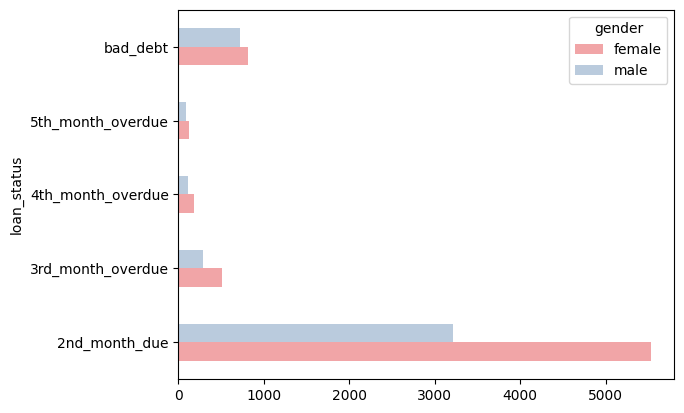

In [ ]:
filtered_loan = df.groupby('loan_status')['gender'].value_counts()

plt.figure(figsize=(15, 9))

colors = ['#f1a5a7','#bacbdd']

filtered_loan[filtered_loan < 10000].unstack().plot(kind='barh', color=colors)

plt.show()

---

### **Observation:**

- As our dataset has more number of females than males so the count of female is larger than the count of males who have paid off their loan for that month and have no loan for the month
- Moreover, the females have more  over due and bad debt than males
---

#### **Getting insight from `loan status v/s gender`**

In [ ]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

### *checking value count of` income_type`s*

In [ ]:
df['income_type'].value_counts()

income_type
Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: count, dtype: int64

### *checking the relationship between `income type and gender`*

<ipython-input-39-e5601cd008fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['income_type'] == count.index[i]], x='gender', palette=custom_palette)
<ipython-input-39-e5601cd008fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['income_type'] == count.index[i]], x='gender', palette=custom_palette)
<ipython-input-39-e5601cd008fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['income_type'] == count.index[i]], x='gender', palette=custom_palette)
<ipython-input-39-e5601cd008fb>:8: FutureWarning: 



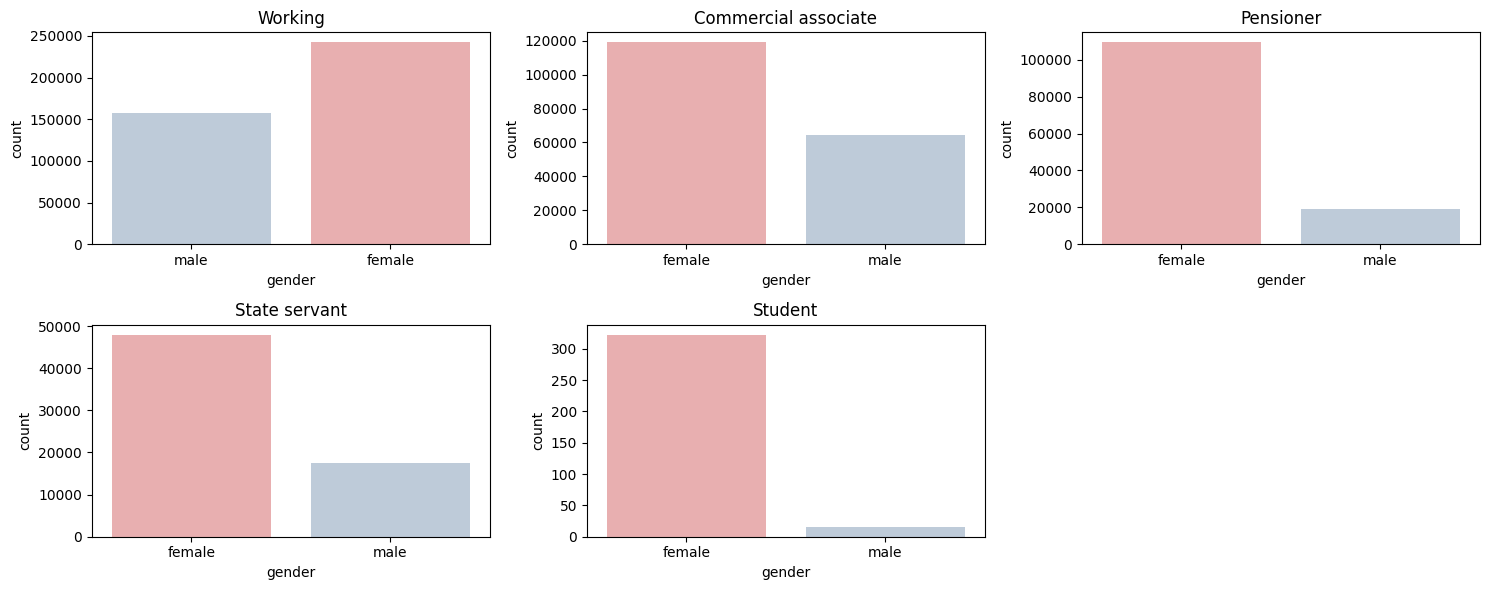

In [ ]:
count = df['income_type'].value_counts()
plt.figure(figsize=(15, 6))
custom_palette = {'female': '#f1a5a7', 'male': '#bacbdd'}

for i in range(len(count)):
    plt.subplot(2, 3, i+1)
    plt.title(count.index[i])
    sns.countplot(data=df[df['income_type'] == count.index[i]], x='gender', palette=custom_palette)

plt.tight_layout()
plt.show()

---
### **Observation**
- In `Working and Commercial assciate income_type` the number of male clients is half of the female clients
- Whereas, in `income_type = Pensioner and  Students` males ATM clients numbers are very less as compared to females
---

### **Checking the relationship between `loan status and income type`**

### *plotting the bar plot of unique values of `loan_status` v/s `income_type`*

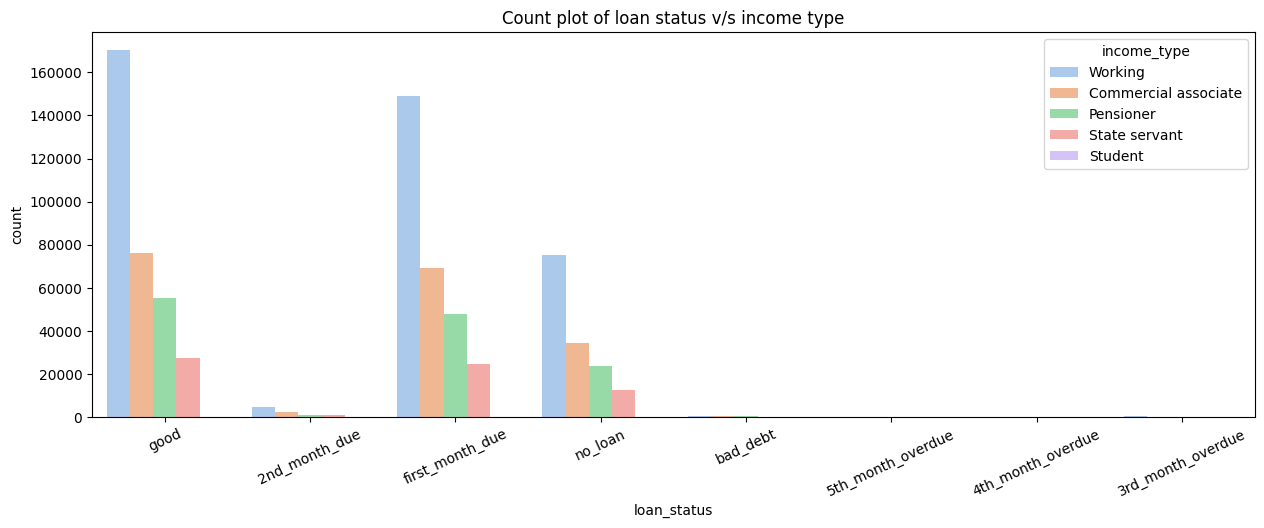

In [ ]:
plt.figure(figsize=(15, 5))

sns.countplot(data=df, x='loan_status', hue='income_type', palette='pastel')

plt.title('Count plot of loan status v/s income type')
plt.xticks(rotation=25)
plt.show()


----

### **Observation:**

- Most of the clients with `working income_type` have paid off their loan for that month
- Similar trend can be seen in the income catagories like `first_month_due & no_loan_for_month` working catagory comes top of the list followed by `commercial associates & pensioners`
---

### *getting insights from `gender v/s income type & loan status` with value counts less than 1000*

In [ ]:
count = df.groupby('gender')[['income_type' , 'loan_status']].value_counts()

count[count<1000].unstack()

loan_status                  2nd_month_due  3rd_month_overdue  \
gender income_type                                              
female Commercial associate            NaN              117.0   
       Pensioner                     950.0              143.0   
       State servant                 592.0               26.0   
       Student                         NaN                NaN   
       Working                         NaN              224.0   
male   Commercial associate          883.0               70.0   
       Pensioner                     207.0               30.0   
       State servant                 175.0               13.0   
       Student                         1.0                NaN   
       Working                         NaN              178.0   

loan_status                  4th_month_overdue  5th_month_overdue  bad_debt  \
gender income_type                                                            
female Commercial associate               47.0               45.0     284.0   
       Pensioner                          66.0               35.0     252.0   
       State servant                      12.0                6.0      47.0   
       Student                             NaN                NaN       NaN   
       Working                            53.0               42.0     226.0   
male   Commercial associate               30.0               27.0     277.0   
       Pensioner                          14.0                9.0      61.0   
       State servant                       5.0                2.0      14.0   
       Student                             NaN                NaN       NaN   
       Working                            59.0               48.0     366.0   

loan_status                  first_month_due   good  no_loan  
gender income_type                                            
female Commercial associate              NaN    NaN      NaN  
       Pensioner                         NaN    NaN      NaN  
       State servant                     NaN    NaN      NaN  
       Student                          57.0  196.0     69.0  
       Working                           NaN    NaN      NaN  
male   Commercial associate              NaN    NaN      NaN  
       Pensioner                         NaN    NaN      NaN  
       State servant                     NaN    NaN      NaN  
       Student                          10.0    4.0      NaN  
       Working                           NaN    NaN      NaN

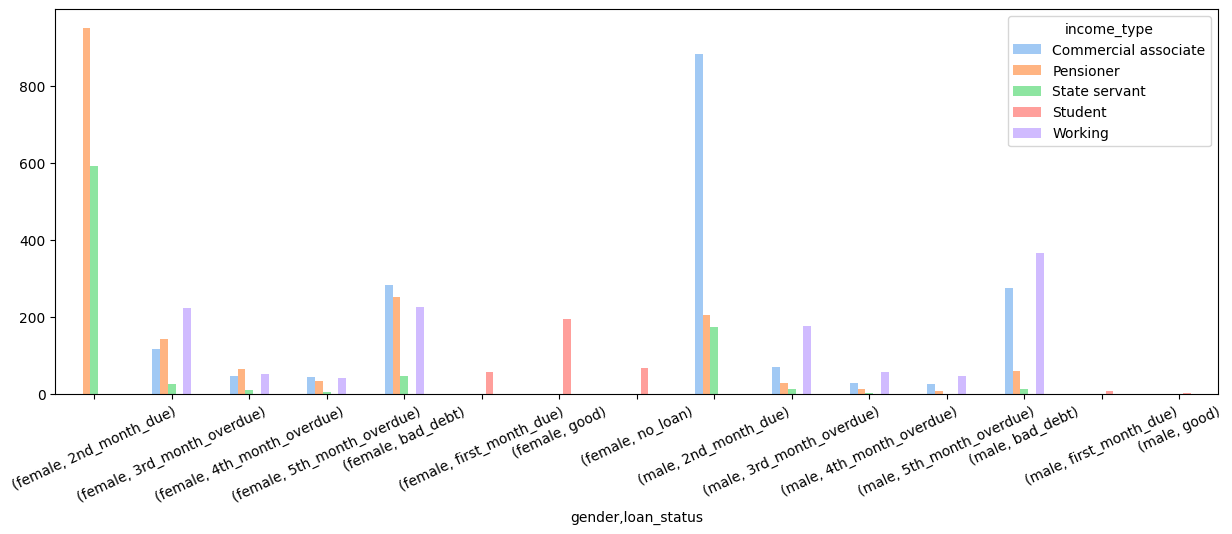

In [ ]:
count = df.groupby('gender')[['loan_status', 'income_type']].value_counts()

filtered_data = count[count < 1000].unstack()
palette = sns.color_palette("pastel", n_colors=len(filtered_data.columns))
ax = filtered_data.plot(kind='bar', figsize=(15, 5), color=palette, legend=True)

plt.xticks(rotation=25)
plt.show()


### *Area Plot of the relationship between gender v/s income type & loan status with value counts less than 1000*

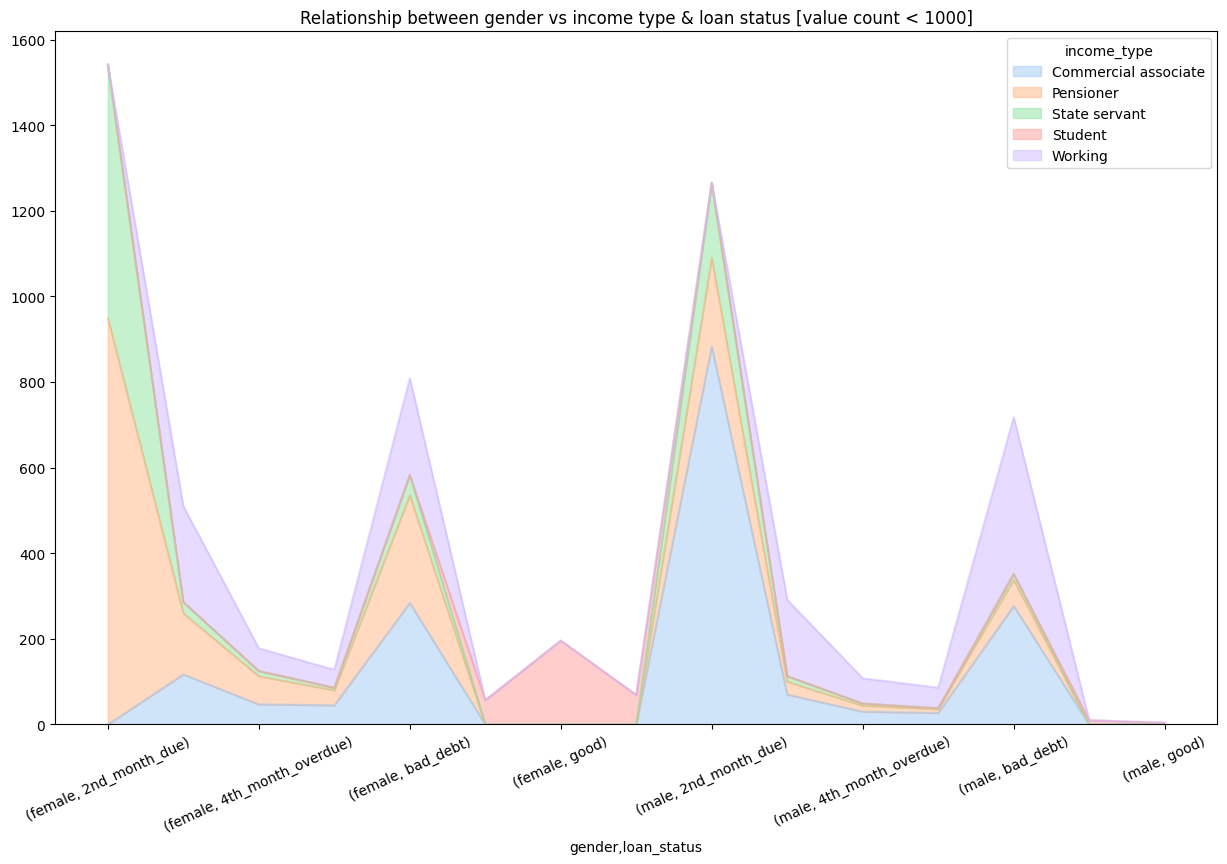

In [ ]:
count = df.groupby('gender')[['loan_status', 'income_type']].value_counts()

filtered_data = count[count < 1000].unstack()

palette = sns.color_palette("pastel", n_colors=len(filtered_data.columns))


filtered_data.plot(kind='area', figsize=(15, 9), color=palette, alpha=0.5)

plt.title('Relationship between gender vs income type & loan status [value count < 1000]')
plt.xticks(rotation=25)
plt.show()

---
### **Observation:**
- When we see `loan_status` trends in terms of `income_type` and `gender` we can see that the male with `student inocme_type` has `no_loan for that month`.
- Also, In `good & first month due loan_status` the number male students is very low and compared to females.
- `State servants income type` in both male and female gender have very less numbers in billing overdue of `loan_status`
- Both males and females students has 1 and 0 numbers respectively in `2nd_month_due` of `loan_status`
----

### **Getting insights from `education` and `gender`**

### *checking the value count of `education`*

In [ ]:
df.education.value_counts()

education
Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: count, dtype: int64

### *value count of `education` vs `gender`*

In [ ]:
df.groupby('gender')[['education']].value_counts()

gender  education                    
female  Secondary / secondary special    349975
        Higher education                 144457
        Incomplete higher                 18638
        Lower secondary                    5177
        Academic degree                     604
male    Secondary / secondary special    174286
        Higher education                  69176
        Incomplete higher                 11691
        Lower secondary                    3478
        Academic degree                     233
Name: count, dtype: int64

### *plotting the value count of `education` vs `gender`*

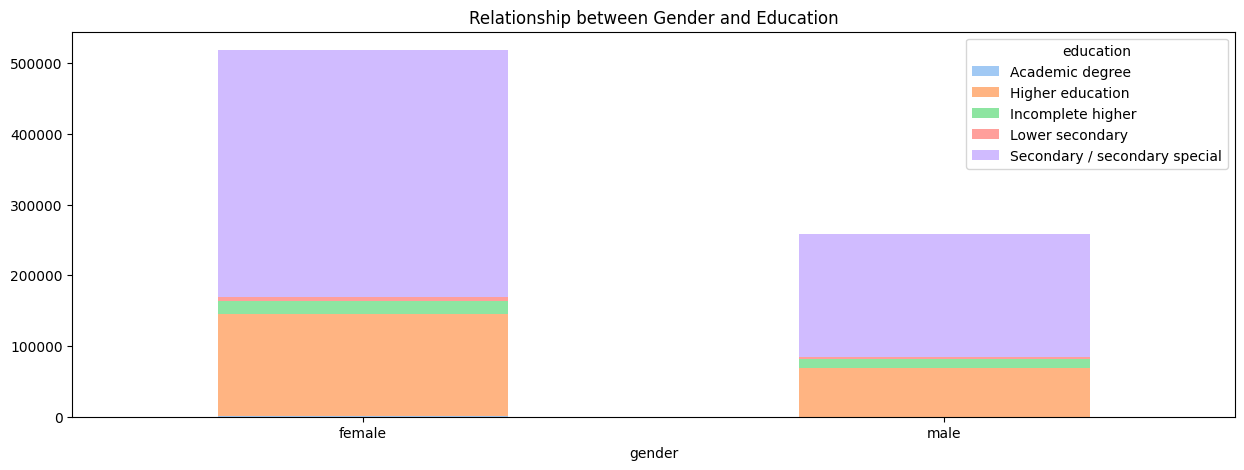

In [ ]:
count = df.groupby('gender')['education'].value_counts().unstack()

palette = sns.color_palette("pastel", n_colors=len(count.columns))

ax = count.plot(kind='bar', stacked=True, figsize=(15, 5), color=palette)

plt.xticks(rotation=0)

plt.title('Relationship between Gender and Education')
plt.show()



----

### **Observation:**
- As our dataset has larget number of people with `secondary` education.
- Therefore, the number of male and female with `secondary` education is high.
- Moreover, the number of `Lower_secondary & Academic degree` is very less in both male and female
- The proportion of `Lower_secondary` eduaction is similar for both genders
---

### **Getting insights from `education` and `loan_status`**

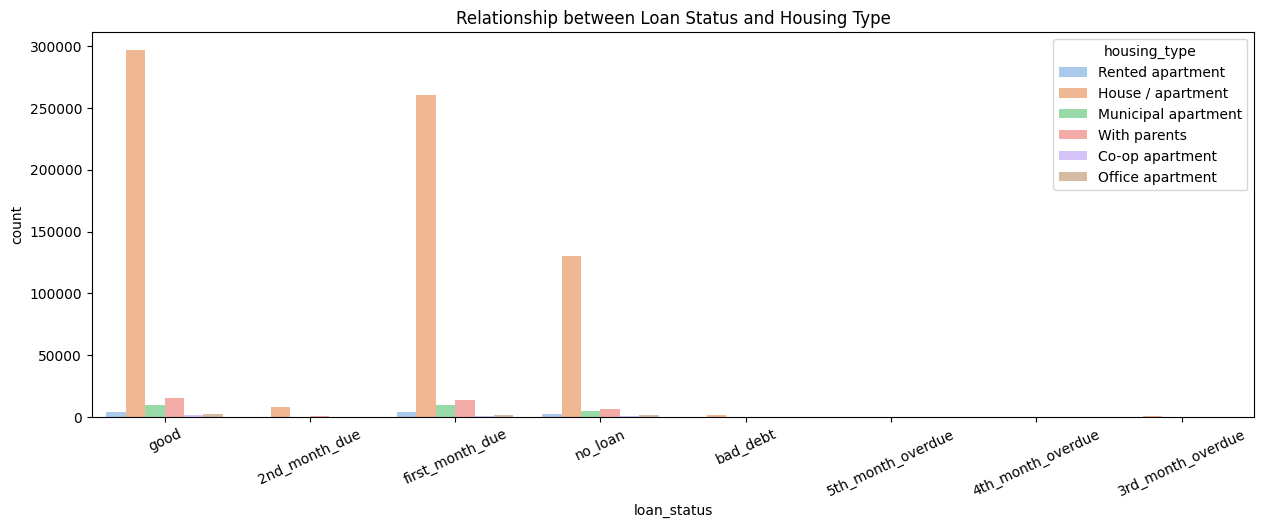

In [ ]:

palette = sns.color_palette("pastel", n_colors=len(df['housing_type'].unique()))

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='loan_status', hue='housing_type', palette=palette)

plt.xticks(rotation=25)
plt.title('Relationship between Loan Status and Housing Type')

plt.show()


### *plotting the barh plot for education vs loan_status [values < 500]*

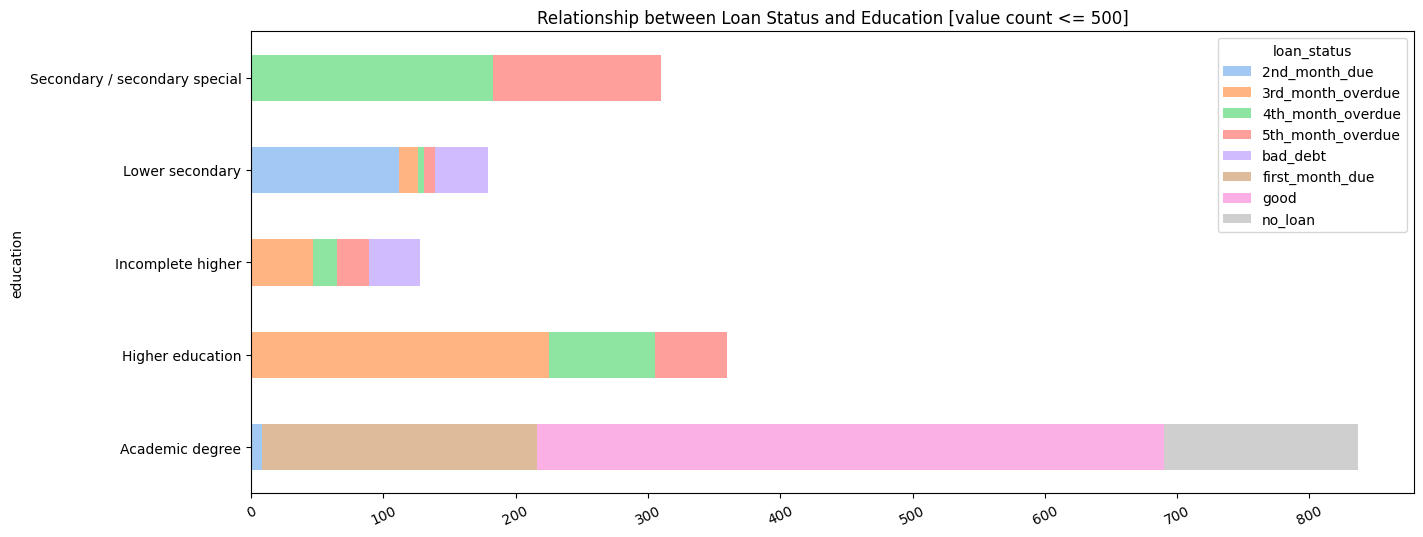

In [ ]:
count = df.groupby(['education', 'loan_status']).size().unstack()

filtered_count = count[count <= 500].dropna(how='all')

palette = sns.color_palette("pastel", n_colors=len(filtered_count.columns))

ax = filtered_count.plot(kind='barh', figsize=(15, 6), color=palette, stacked=True)

plt.title('Relationship between Loan Status and Education [value count <= 500]')

plt.xticks(rotation=25)
plt.show()

-----

### **Observation:**

- As our dataset has larget number of people with `secondary` education and they have largest numbers who have paid off their loan
- A similar trend can be seen in the `Academic degree` education
- The mostly people who have bad debt are from `Lower_secondary & Incomplete higher` education
---

### **Getting insights from `housing_type` and `loan_status`**

### *unique enteries & value count from `housing_type`*

In [ ]:
df['housing_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df['housing_type'].value_counts()

housing_type
House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64

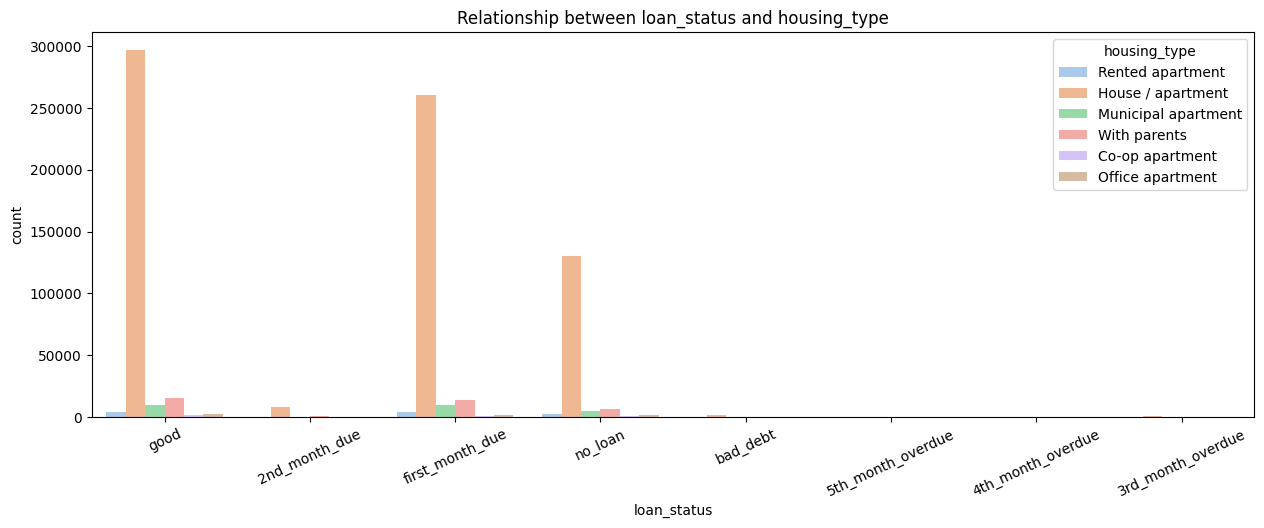

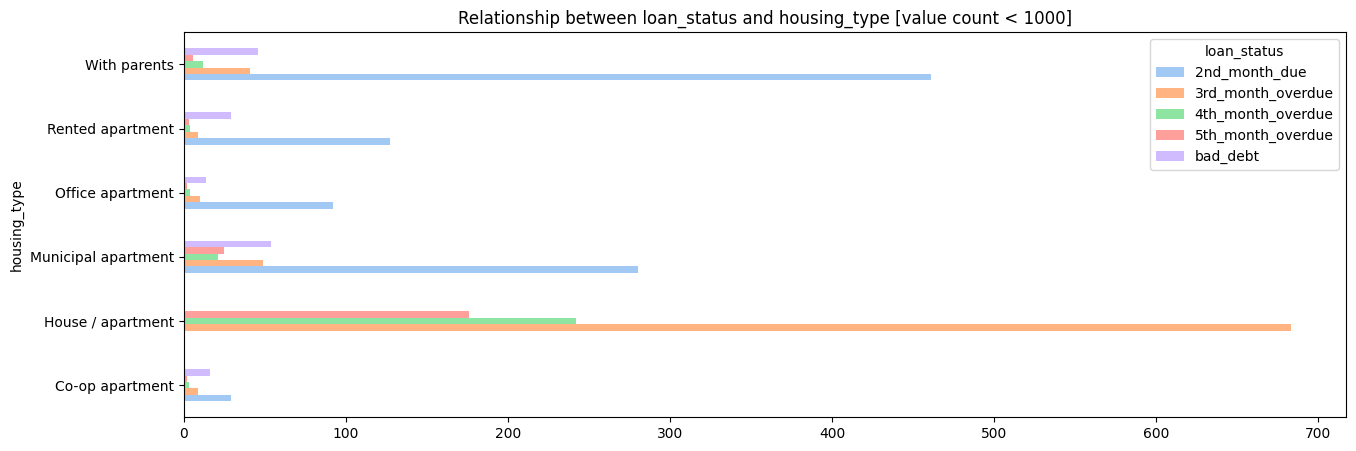

In [ ]:
palette = sns.color_palette("pastel", n_colors=len(df['housing_type'].unique()))
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='loan_status', hue='housing_type', palette=palette)

plt.xticks(rotation=25)
plt.title('Relationship between loan_status and housing_type')
plt.show()

count = df.groupby(['housing_type', 'loan_status']).size()
filtered_count = count[count < 1000].unstack()

colors = [palette[i] for i in range(filtered_count.shape[1])]
filtered_count.plot(kind='barh', figsize=(15, 5), color=colors, legend=True)

plt.title('Relationship between loan_status and housing_type [value count < 1000]')
plt.show()

### *filtering the value counts `housing & loan_status==bad_debt`*

In [ ]:
count = df.groupby(['housing_type', 'loan_status']).size()

bad_loan= count[count.index.get_level_values('loan_status') == 'bad_debt']
bad_loan


housing_type         loan_status
Co-op apartment      bad_debt         16
House / apartment    bad_debt       1368
Municipal apartment  bad_debt         54
Office apartment     bad_debt         14
Rented apartment     bad_debt         29
With parents         bad_debt         46
dtype: int64

### *plotting the value count < 1000 from `housing_type & loan_status`*

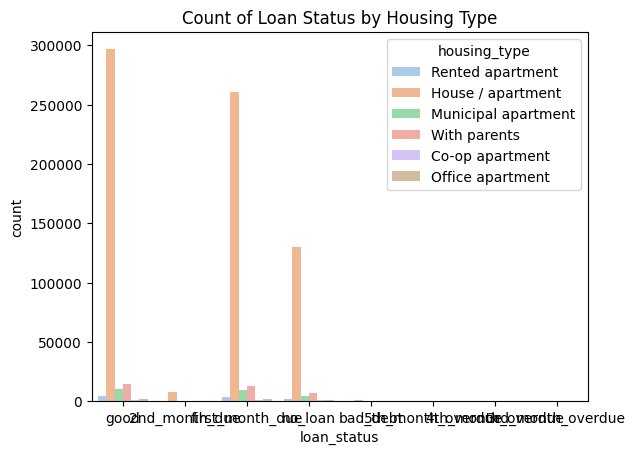

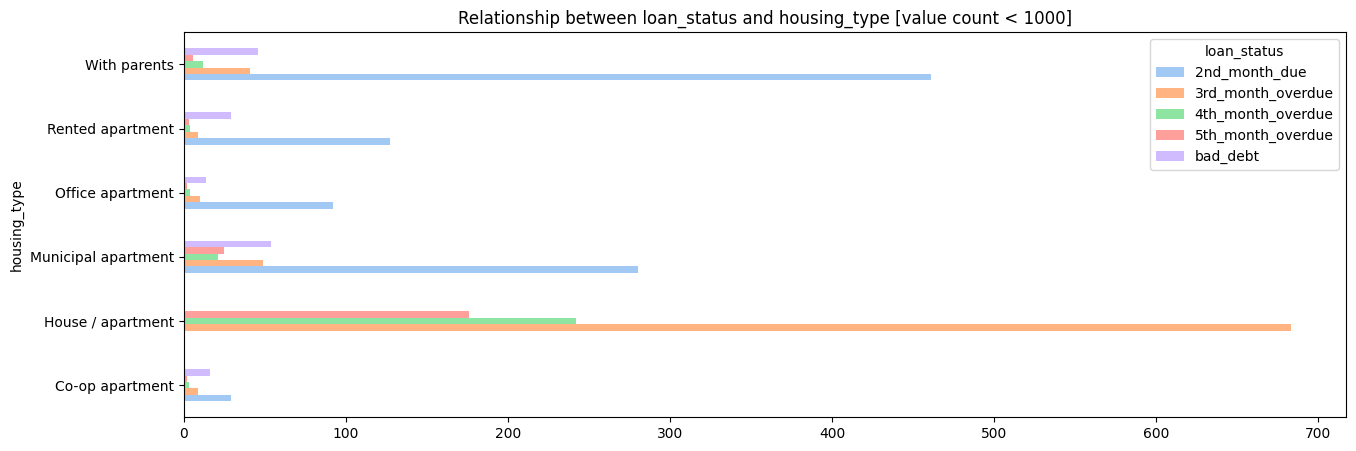

In [ ]:
palette = sns.color_palette("pastel", n_colors=len(df['housing_type'].unique()))

sns.countplot(data=df, x='loan_status', hue='housing_type', palette=palette)
plt.title('Count of Loan Status by Housing Type')
plt.show()

count = df.groupby(['housing_type', 'loan_status']).size()
filtered_count = count[count < 1000].unstack()

colors = [palette[i] for i in range(filtered_count.shape[1])]
filtered_count.plot(kind='barh', figsize=(15, 5), color=colors, legend=True)

plt.title('Relationship between loan_status and housing_type [value count < 1000]')
plt.show()

---

### **Observation:**

- Mostly people who have their own house have `good , first month due & no_loan` loan_status which is a positive trend.
- People who live `with parents` have largest share in `2nd_month_due` loan_status. This trend is followed by `Municipal apartment , Rented apartment` and `With office apartment` respectively
- The people with lowest number of `bad_debt` loan_status are from `office apartment & co apartment` housing type
---

### **Getting insights from `family_members` and `loan_status`**

In [ ]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

In [ ]:
df.family_members.value_counts()

family_members
2     423723
1     141477
3     134894
4      66990
5       8999
6       1196
7        273
15       111
9         46
20         6
Name: count, dtype: int64

In [ ]:
df.groupby('family_members')[['loan_status']].value_counts().unstack()

loan_status,2nd_month_due,3rd_month_overdue,4th_month_overdue,5th_month_overdue,bad_debt,first_month_due,good,no_loan
family_members,,,,,,,,
1,1651.0,179.0,71.0,52.0,239.0,53411.0,59894.0,25980.0
2,4571.0,414.0,161.0,108.0,808.0,157392.0,181131.0,79138.0
3,1528.0,132.0,34.0,34.0,381.0,50885.0,54889.0,27011.0
4,858.0,54.0,15.0,18.0,92.0,25110.0,29037.0,11806.0
5,108.0,21.0,4.0,1.0,5.0,3234.0,4068.0,1558.0
6,16.0,1.0,1.0,1.0,2.0,463.0,442.0,270.0
7,NaN,NaN,NaN,NaN,NaN,57.0,53.0,163.0
9,10.0,NaN,NaN,NaN,NaN,14.0,22.0,NaN
15,5.0,NaN,NaN,NaN,NaN,82.0,NaN,24.0


----

### **Observation:**

- Most of the clients have `2` family member
- The `loan_status` of the atm users is `good , first month due & no_loan` who have `1 ,2 or 3 family member` which is a positive trend
- Wheeras, the number for `loan status = 2nd month due` is comparatively high for `2 family members`
---

### **Checking the relationship between `childern` count &   `loan_status`**

In [ ]:
df.select_dtypes(exclude='object').columns

Index(['ID', 'children', 'income', 'age_in_days', 'employment_in_days',
       'mobile', 'work_phone', 'phone', 'email', 'family_members',
       'months_balance'],
      dtype='object')

In [ ]:
df.children.value_counts()

children
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64

In [ ]:
df.groupby('children')[['loan_status']].value_counts().unstack()

loan_status,2nd_month_due,3rd_month_overdue,4th_month_overdue,5th_month_overdue,bad_debt,first_month_due,good,no_loan
children,,,,,,,,
0,5908.0,559.0,213.0,146.0,994.0,201794.0,230268.0,100757.0
1,1801.0,156.0,51.0,46.0,434.0,58550.0,64120.0,30480.0
2,888.0,64.0,17.0,20.0,92.0,26171.0,30485.0,12662.0
3,119.0,21.0,4.0,1.0,5.0,3468.0,4143.0,1567.0
4,16.0,1.0,1.0,1.0,2.0,490.0,416.0,297.0
5,NaN,NaN,NaN,NaN,NaN,79.0,82.0,163.0
7,10.0,NaN,NaN,NaN,NaN,14.0,22.0,NaN
14,5.0,NaN,NaN,NaN,NaN,82.0,NaN,24.0
19,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN


### **Getting insights from `employment_in_days`**

### *count of persons who are `unemployed`*

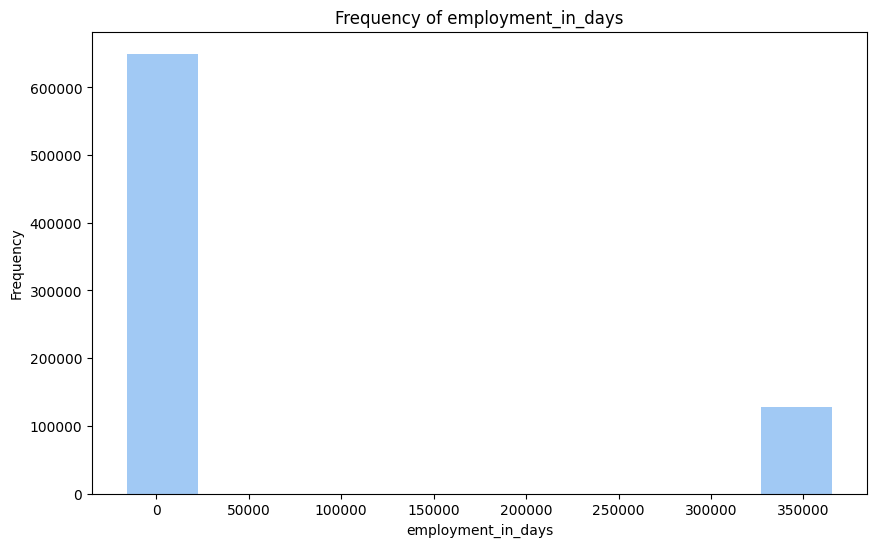

In [ ]:
palette = sns.color_palette("pastel", n_colors=1)

plt.figure(figsize=(10, 6))
df['employment_in_days'].plot(kind='hist', color=palette[0])

plt.title('Frequency of employment_in_days')
plt.xlabel('employment_in_days')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df[df['employment_in_days'] > 0].value_counts().sum()

127972

---

### **Observations:**

- The value in `employment in days` which are greater than `0` shows the status of the person is `unemployed`
- We have `127972` persone who are `unemployed`

---

### **Checking the relationship between `employment_in_days > 0 (unemployment)` & `loan_status`**

In [ ]:
filtered_df = df[df['employment_in_days'] > 0]

filtered_df.groupby('loan_status').size()

loan_status
2nd_month_due         1128
3rd_month_overdue      149
4th_month_overdue       73
5th_month_overdue       37
bad_debt               266
first_month_due      47620
good                 55172
no_loan              23527
dtype: int64

---

### **Observations:**
- The `loan_status` of the most of the `unemployed` persons is `good , first month due & no_loan` which is a positive trend.
- Whereas, the `loan_status` of the `bad_debt` for unemployed persons is very low.
---

# **Data Preprocessing**

In [ ]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

### *plotting the scatter plot of numeric columns*

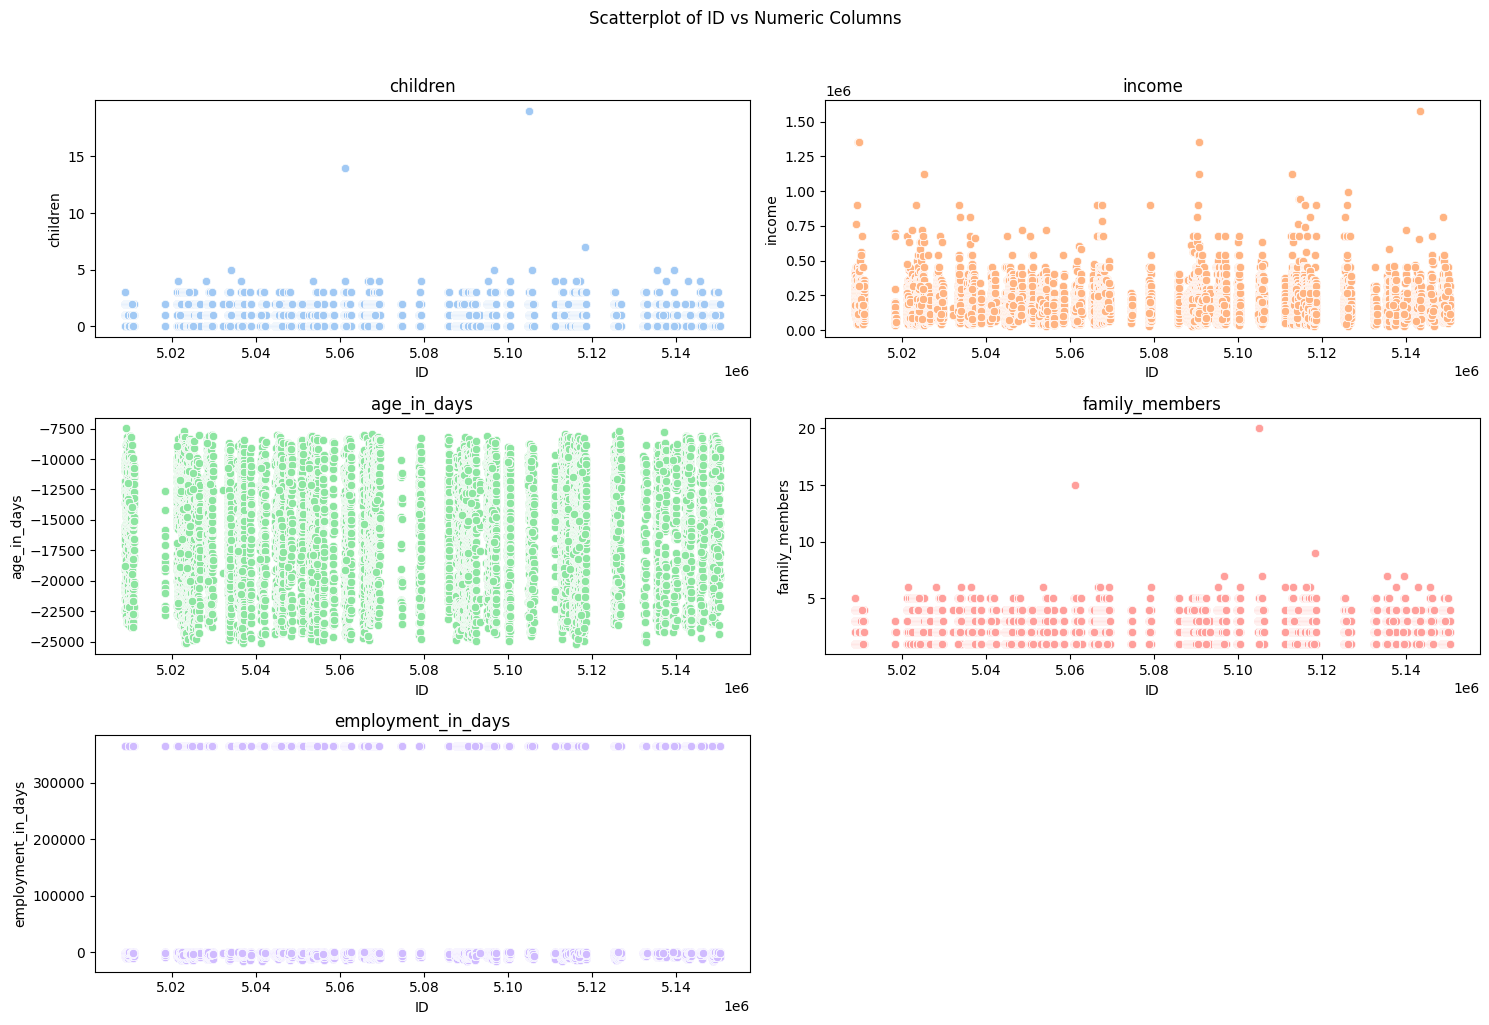

In [ ]:
palette = sns.color_palette("pastel", n_colors=len(col))

col = ['children', 'income', 'age_in_days', 'family_members', 'employment_in_days']

plt.figure(figsize=(15, 10))

for i in range(len(col)):
    plt.subplot(3, 2, i + 1)
    plt.title(col[i])
    sns.scatterplot(data=df, y=col[i], x='ID', color=palette[i])

plt.suptitle('Scatterplot of ID vs Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

### *plotting the boxplot of numeric columns*

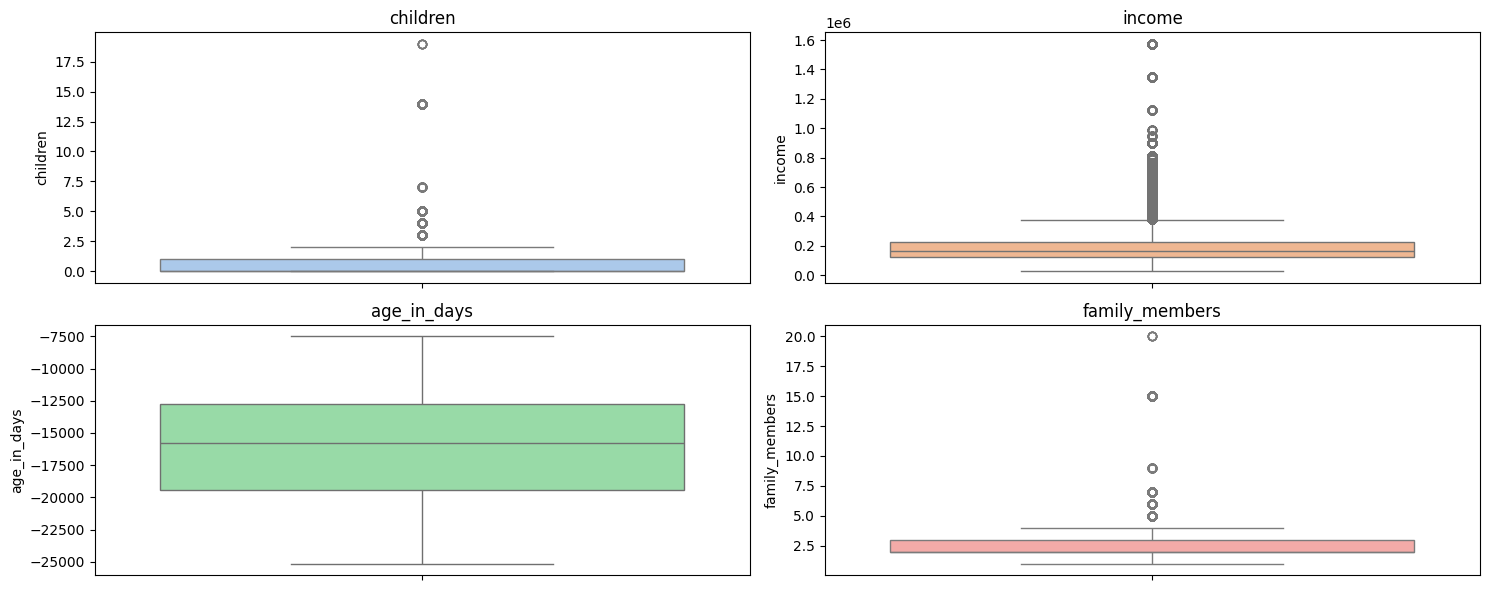

In [ ]:
palette = sns.color_palette("pastel", n_colors=len(col))

col = ['children', 'income', 'age_in_days', 'family_members']

plt.figure(figsize=(15, 6))

for i in range(len(col)):
    plt.subplot(2, 2, i + 1)
    plt.title(col[i])
    sns.boxplot(data=df, y=col[i], color=palette[i])

plt.tight_layout()
plt.show()


---
### **Observations**
- As we can see that the outliers are present in three columns:
  - income
  - children
  - family_members
- Both scatter plot and box plot are showing outliers in the above mention columns
  
----

### *Removing outliers from `['children', 'income' , 'family_members']`*

In [ ]:
col = ['children', 'income' , 'family_members']

for i in range(len(col)):

    q1 = df[col[i]].quantile(0.25)
    q3 = df[col[i]].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    df[col[i]] = np.where((df[col[i]] >= upper_bound) | (df[col[i]] <= lower_bound), df[col[i]].median() , df[col[i]])

### *again plotting boxplot to confirm outcomes*

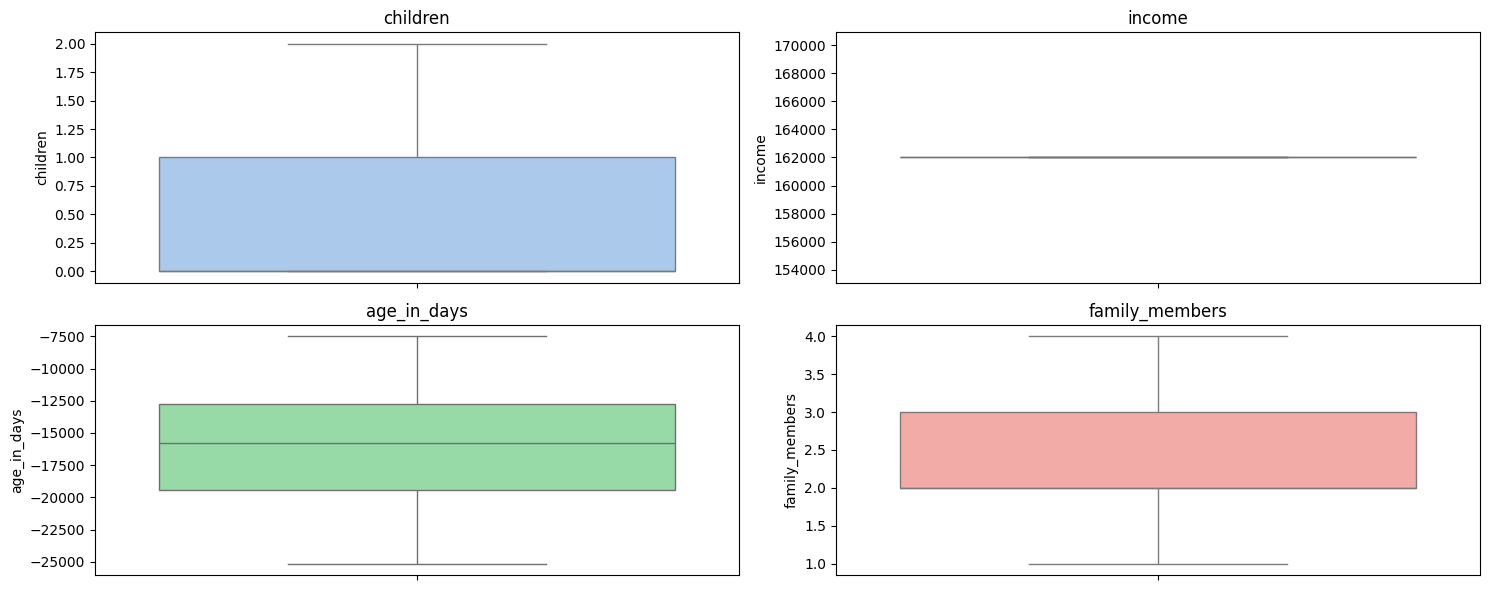

In [ ]:
col = ['children', 'income', 'age_in_days', 'family_members']

palette = sns.color_palette("pastel", n_colors=len(col))

plt.figure(figsize=(15, 6))

for i in range(len(col)):
    plt.subplot(2, 2, i+1)
    plt.title(col[i])
    sns.boxplot(data=df, y=col[i], color=palette[i])

plt.tight_layout()
plt.show()

In [ ]:
df.select_dtypes(exclude='object').columns

### **Standardization**

In [ ]:
col = ['children', 'income', 'age_in_days',  'family_members']

sc = StandardScaler()

for i in col:
    df[i] = sc.fit_transform(df[[i]])

----

# **Suitability of Model(Random Forest Classifier)**

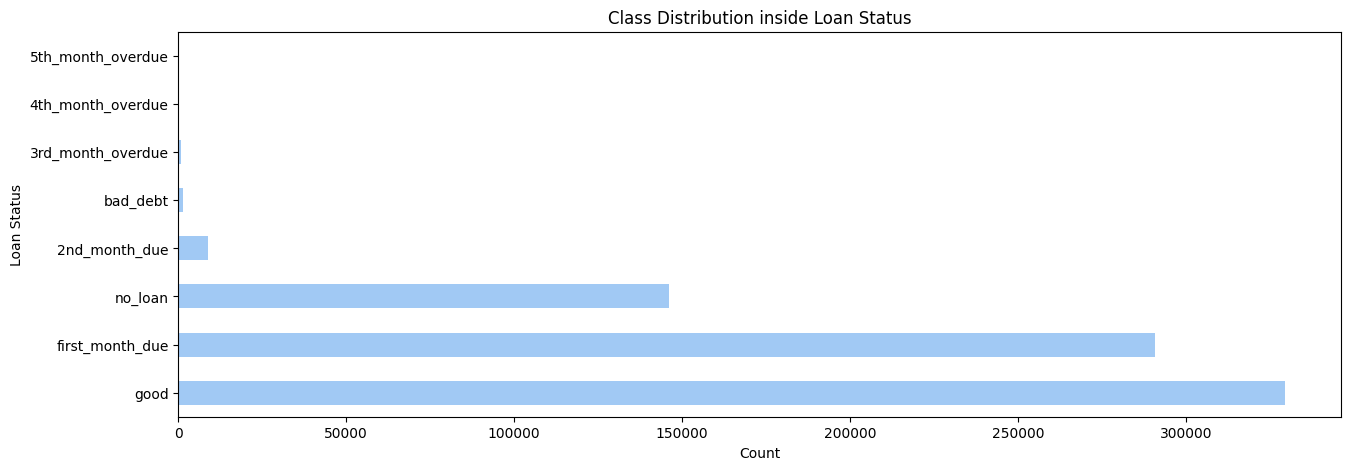

In [ ]:
palette = sns.color_palette("pastel", n_colors=1)

df.loan_status.value_counts().plot(kind='barh', figsize=(15, 5), color=palette[0])
plt.title('Class Distribution inside Loan Status')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

---

### **Observation:**

- The `loan_status` is our `target variable`.
- If we see the class distribution, of our target variable `loan_status`, we can see that our target variable is highly imbalanced.
- Which means that we cannot use `logistic regression` on our data.
- That is why we need to use `Random Forest Classifier` for our model.
---

In [ ]:
df.head(10)

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,0,C,good
1,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-1,C,good
2,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-2,C,good
3,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-3,C,good
4,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-4,C,good
5,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-5,C,good
6,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-6,C,good
7,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-7,C,good
8,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-8,C,good
9,5008804,male,yes,yes,-0.590317,0.0,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-9,C,good


In [ ]:
df.tail(10)

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
777705,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-4,0,first_month_due
777706,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-5,0,first_month_due
777707,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-6,0,first_month_due
777708,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-7,0,first_month_due
777709,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-8,0,first_month_due
777710,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-9,0,first_month_due
777711,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-10,2,3rd_month_overdue
777712,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-11,1,2nd_month_due
777713,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-12,0,first_month_due
777714,5150337,male,no,yes,-0.590317,0.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1.690163,-1193,1,0,0,0,-1.418566,-13,0,first_month_due


# **Label Encoding**


In [ ]:
df.columns


Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

In [ ]:
col = ['gender', 'own_car', 'own_property', 'income_type','education', 'family_status', 'housing_type', 'status']
le = LabelEncoder()
for i in col:
    df[i] =le.fit_transform(df[i] )


In [ ]:
df.head(20)

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,0,6,good
1,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-1,6,good
2,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-2,6,good
3,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-3,6,good
4,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-4,6,good
5,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-5,6,good
6,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-6,6,good
7,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-7,6,good
8,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-8,6,good
9,5008804,1,1,1,-0.590317,0.0,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-9,6,good


# **Best Features Selection: Random Forest Classifier**

### **Independence of Observations:**
### *Correlation Matrix for Numerical Features*

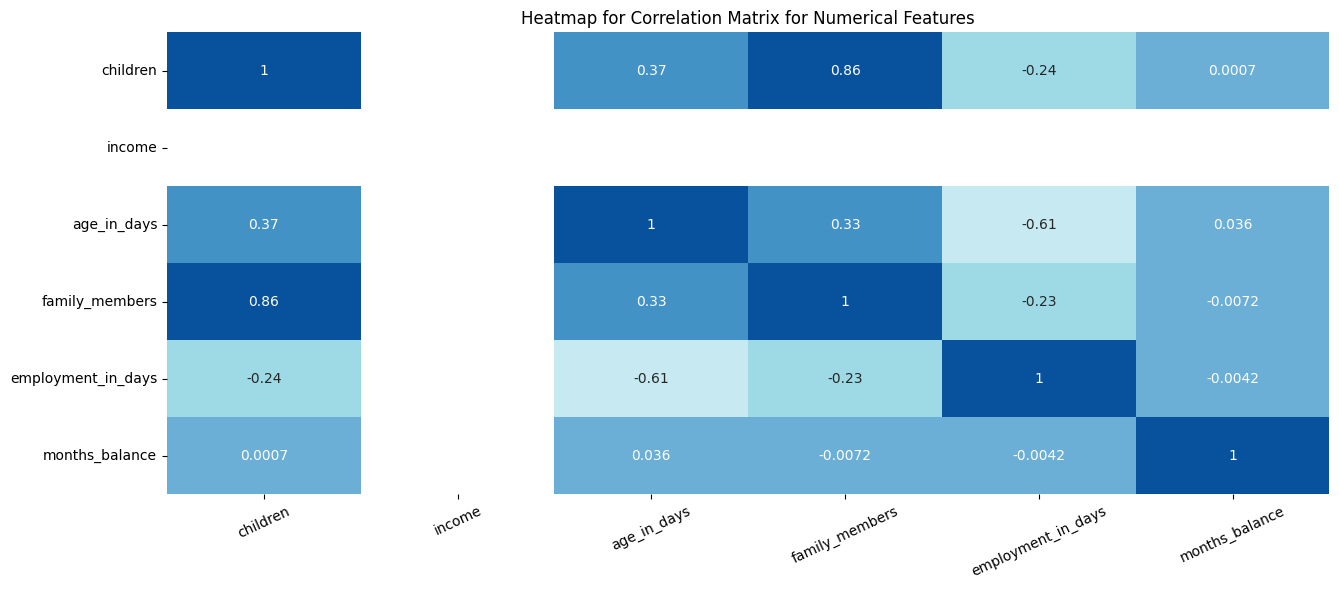

In [ ]:
soft_blue_palette = ["#C7E9F1", "#9EDAE6", "#6BAED6", "#4292C6", "#2171B5", "#08519C"]

plt.figure(figsize=(15, 6))

sns.heatmap(df[['children', 'income', 'age_in_days', 'family_members', 'employment_in_days', 'months_balance']].corr(),
            annot=True,
            cbar=False,
            cmap=sns.color_palette(soft_blue_palette))

plt.xticks(rotation=25)
plt.title('Heatmap for Correlation Matrix for Numerical Features')
plt.show()

----
### **Observation**
- As we can see that `children` and `family_members` are highly correlated with each other
- But there is no strong correlation between other numerical features

- Hence, the condition of `Independence of Observations` is almost satisfied for `Random Forest Classifier`.

---

### **Check for Multicollinearity**

### *Variance Inflation Factor*

In [ ]:
col = df.drop(['loan_status', 'status'], axis=1)

factor  = pd.DataFrame(columns=["VIF", "Features"] )

factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]


factor

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,VIF,Features
0,1.018207,ID
1,1.205340,gender
2,1.200357,own_car
3,1.095587,own_property
4,12.231763,children
5,NaN,income
6,1.174153,income_type
7,1.063949,education
8,4.476563,family_status
9,1.071850,housing_type


---

### **Observation**

- Multicollinearity occurs when two or more predictor variables in the model are highly correlated.

- Variance Inflation Factor (VIF) is 1.0 for all columns except `children`, `family_status` and `mobile` which are highly correlated with each other.
- Also, the columns `children` and `family_status` are highly correlated with each other.
- Hence, we need to drop `children , family_status & mobile` columns from our independent variable list to get best results from Random Forest Classifier.
---

# **Model Building**

### *Spliting the dataset into Features and Labels*

In [ ]:
X = df.drop(['loan_status' , 'status', 'children' , 'family_members', 'mobile'], axis = 1) # Assume that X is our independent variable

y = df['loan_status']

In [ ]:
X.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'income', 'income_type',
       'education', 'family_status', 'housing_type', 'age_in_days',
       'employment_in_days', 'work_phone', 'phone', 'email', 'months_balance'],
      dtype='object')

In [ ]:
X.head(20)

,ID,gender,own_car,own_property,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,work_phone,phone,email,months_balance
0,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,0
1,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-1
2,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-2
3,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-3
4,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-4
5,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-5
6,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-6
7,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-7
8,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-8
9,5008804,1,1,1,0.0,4,1,0,4,1.00381,-4542,1,0,0,-9


In [ ]:
X.tail(20)

,ID,gender,own_car,own_property,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,work_phone,phone,email,months_balance
777695,5150049,0,0,1,0.0,4,4,1,1,-0.446620,-655,0,0,0,-4
777696,5150049,0,0,1,0.0,4,4,1,1,-0.446620,-655,0,0,0,-5
777697,5150049,0,0,1,0.0,4,4,1,1,-0.446620,-655,0,0,0,-6
777698,5150049,0,0,1,0.0,4,4,1,1,-0.446620,-655,0,0,0,-7
777699,5150049,0,0,1,0.0,4,4,1,1,-0.446620,-655,0,0,0,-8
777700,5150049,0,0,1,0.0,4,4,1,1,-0.446620,-655,0,0,0,-9
777701,5150337,1,0,1,0.0,4,4,3,4,1.690163,-1193,0,0,0,0
777702,5150337,1,0,1,0.0,4,4,3,4,1.690163,-1193,0,0,0,-1
777703,5150337,1,0,1,0.0,4,4,3,4,1.690163,-1193,0,0,0,-2
777704,5150337,1,0,1,0.0,4,4,3,4,1.690163,-1193,0,0,0,-3


In [ ]:
print(f'The shpape of X ={X.shape} \n')

print(f'The shape of y ={y.shape}')

The shpape of X =(777715, 15) 

The shape of y =(777715,)


### *Train Test Split*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

---

### **Observation:**
- We have splitted the dataset into 80% train and 20% test
- We have used `Random Forest Classifier` as our model
- 80% of our dataset is used for training
- 20% of our dataset is used for testing
---

### *Calling the model*

In [ ]:
model = RandomForestClassifier()

### *Fitting the model*

In [ ]:
model.fit(X_train, y_train )

RandomForestClassifier()

### *Predicting the model*

In [ ]:
y_pred = model.predict(X_test)

### *Actual vs Predicted*

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
489996,first_month_due,first_month_due
293437,first_month_due,first_month_due
544675,first_month_due,first_month_due
688170,good,good
582519,no_loan,first_month_due
248623,good,good
476807,first_month_due,first_month_due
693691,good,good
89611,good,good
756662,good,good


### *Model Evaluation*

In [ ]:
(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.2f} %')

'Accuracy Score : 87.05 %'

In [ ]:
print(f"Precision Score : {precision_score(y_test, y_pred , average = 'micro'):.2f}")

Precision Score : 0.87


In [ ]:
print(f"F1-Score : {f1_score(y_test, y_pred , average='micro')}")

F1-Score : 0.8705245494814938


In [ ]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    2nd_month_due       0.33      0.25      0.29      1743
3rd_month_overdue       0.16      0.13      0.14       150
4th_month_overdue       0.07      0.06      0.07        52
5th_month_overdue       0.03      0.03      0.03        33
         bad_debt       0.92      0.84      0.88       307
  first_month_due       0.84      0.86      0.85     58003
             good       0.93      0.94      0.94     66226
          no_loan       0.82      0.77      0.79     29029

         accuracy                           0.87    155543
        macro avg       0.51      0.48      0.50    155543
     weighted avg       0.87      0.87      0.87    155543



----
### **Metric Interpretation**

#### **Accuracy Score**
- The accuracy score represents the ratio of correct predictions made by the model to the total number of predictions.
  
- The value of accuracy score ranges from 0 to 1 (100%).

- **An accuracy of 88.11% indicates that our model correctly predicts credit card default outcomes with high reliability**



### **Precision Score**
- Precision measures the proportion of positive identifications that were actually correct.
- Precision = TP / (TP + FP), where TP represents true positives and FP represents false positives.
- **The precision score is of our model is `0.88` which indicates that the number of False positives is very less.**


### **Recall Score**
- Recall is basically the percentage of correct negative predictions made by the model
  - Formula: Recall = TP / (TP + FN)
  - (i.e. the number of correct negative predictions divided by the total number of negative predictions)
- The value of recall score ranges from 0 to 1.
  
- **The Recall score is of our model is `0.8811` which indicates that the number of False negatives is very less.**


### **F1 Score**

- F1 score is basically the harmonic mean of precision and recall
  - Formula: F1 = 2 * (precision * recall) / (precision + recall)
- It is usefull when we have imbalanced classes in our dataset and it gives the best results by including precision and recall.
----


**Author** : Audrey Naila Putri

**Email**  : **audreynailaputri15@gmail.com**